## What's the Exercise?

- Load in the data and perform a hypothesis test
- Answer the question: Is there a significant difference in CTR?
- Assume a significance threshold of 5%

In [26]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import ztest
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("datasets/advertisement_clicks.csv")

In [4]:
df.head()

,advertisement_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [6]:
df.dtypes

advertisement_id    object
action               int64
dtype: object

In [24]:
x1 = df[(df["advertisement_id"] == "A")]["action"].dropna().to_numpy()
x2 = df[(df["advertisement_id"] == "B")]["action"].dropna().to_numpy()

In [29]:
x1.mean()

0.304

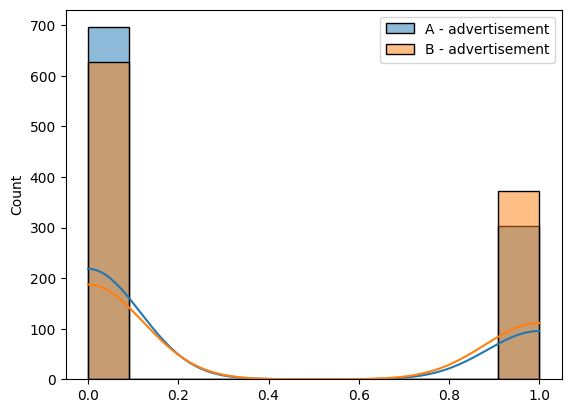

In [31]:
sns.histplot(x1,  label="A - advertisement", kde=True)
sns.histplot(x2,  label="B - advertisement", kde=True)
plt.legend()

In [49]:
z, p = ztest(x1, x2, usevar="unequal")

In [50]:
is_significant = p < 0.05
print("Is there a significant difference in CTR?: ", is_significant)


Is there a significant difference in CTR?:  True


In [51]:
mean_x1 = x1.mean()
mean_x2 = x2.mean()

# Determine which CTR is superior
if is_significant:
    if mean_x1 > mean_x2:
        print("CTR for advertisement A is significantly higher.")
    else:
        print("CTR for advertisement B is significantly higher.")
else:
    print("There is no significant difference in CTR between advertisements A and B.")

CTR for advertisement B is significantly higher.


In [52]:
# Determine which CTR is superior based on the z-value
print(z)
if is_significant:
    if z > 0:
        print("CTR for advertisement A is significantly higher.")
    else:
        print("CTR for advertisement B is significantly higher.")
else:
    print("There is no significant difference in CTR between advertisements A and B.")

-3.2211732138019786
CTR for advertisement B is significantly higher.


In [36]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import pandas as pd
from scipy import stats

# get data
df = pd.read_csv('datasets/advertisement_clicks.csv')
a = df[df['advertisement_id'] == 'A']
b = df[df['advertisement_id'] == 'B']
a = a['action']
b = b['action']

print("a.mean:", a.mean())
print("b.mean:", b.mean())

# built-in t-test:
t, p = stats.ttest_ind(a, b)
print("t:\t", t, "p:\t", p)

# welch's t-test:
t, p = stats.ttest_ind(a, b, equal_var=False)
print("Welch's t-test:")
print("t:\t", t, "p:\t", p)

# welch's t-test manual:
N1 = len(a)
s1_sq = a.var()
N2 = len(b)
s2_sq = b.var()
t = (a.mean() - b.mean()) / np.sqrt(s1_sq / N1 + s2_sq / N2)

nu1 = N1 - 1
nu2 = N2 - 1
df = (s1_sq / N1 + s2_sq / N2)**2 / ( (s1_sq*s1_sq) / (N1*N1 * nu1) + (s2_sq*s2_sq) / (N2*N2 * nu2) )
p = (1 - stats.t.cdf(np.abs(t), df=df))*2
print("Manual Welch t-test")
print("t:\t", t, "p:\t", p)

a.mean: 0.304
b.mean: 0.372
t:	 -3.221173213801978 p:	 0.001297190546712528
Welch's t-test:
t:	 -3.221173213801978 p:	 0.0012972410374001671
Manual Welch t-test
t:	 -3.2211732138019786 p:	 0.001297241037400143
